# Outlier Detection with clustering/classification

## Outlier Detection with K-Means Clustering

In [1]:
import pandas as pd
df = pd.read_csv('./data/Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [2]:
df = df.rename(columns={'Annual Income (k$)' : 'Income', 'Spending Score (1-100)' : 'Score' })

In [3]:
# standardize variables
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()
df[['Income', 'Score']] = scaler.fit_transform(df[['Income', 'Score']])
df = df.loc[:, 'Income' :]
df.head()

,Income,Score
0,-1.738999,-0.434801
1,-1.738999,1.195704
2,-1.700830,-1.715913
3,-1.700830,1.040418
4,-1.662660,-0.395980


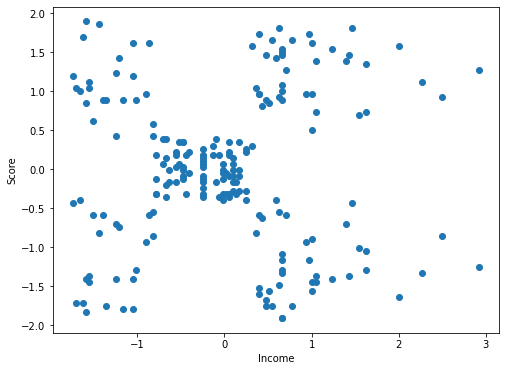

In [4]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.scatter(df.Income, df.Score)
plt.xlabel('Income')
plt.ylabel('Score')
plt.show()

In [5]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=5)
model = km.fit(df)

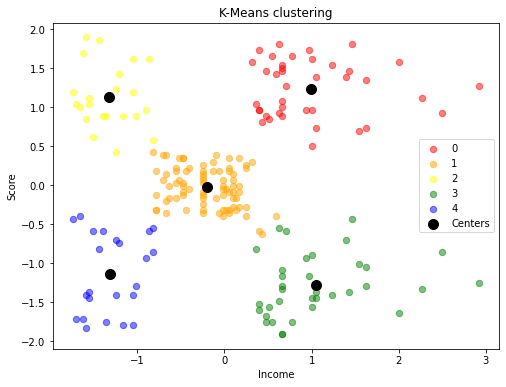

In [6]:
import numpy as np
colors = ['red', 'orange', 'yellow', 'green', 'blue']

plt.figure(figsize=(8,6))
for i in range(np.max(model.labels_) + 1) :
    plt.scatter(df[model.labels_ == i].Income, 
               df[model.labels_==i].Score, label=i, c=colors[i], alpha=0.5, s=40)
plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], 
               label='Centers', c='black', s=100)
plt.title('K-Means clustering')
plt.xlabel('Income')
plt.ylabel('Score')
plt.legend()
plt.show()

In [7]:
# Outlier detection
# 각 센터에서 데이터의 거리를 계산
def distance_from_center(income, score, label) :
    center_income = model.cluster_centers_[label, 0]
    center_score = model.cluster_centers_[label, 1]
    dist = np.sqrt((income - center_income) ** 2 + (score - center_score))
    return np.round(dist, 3)

df['label'] = model.labels_
df['distance'] = distance_from_center(df.Income, df.Score, df.label)
df.head()

C:\Users\PC\anaconda3\envs\yeseul\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


,Income,Score,label,distance
0,-1.738999,-0.434801,4,0.943
1,-1.738999,1.195704,2,0.481
2,-1.700830,-1.715913,4,NaN
3,-1.700830,1.040418,2,0.215
4,-1.662660,-0.395980,4,0.931


In [8]:
# check most distant data
df.sort_values('distance', ascending=False).head(10)

,Income,Score,label,distance
199,2.917671,1.273347,0,1.935
198,2.917671,-1.250054,3,1.872
196,2.497807,-0.861839,3,1.582
197,2.497807,0.923953,0,1.398
195,2.268791,1.118061,0,1.229
194,2.268791,-1.327697,3,1.196
193,2.001605,1.583920,0,1.168
184,1.467233,-0.434801,3,1.010
124,0.360319,-0.823017,3,0.972
146,0.627505,-0.551266,3,0.957


In [9]:
outlier_indexs = list(df.sort_values('distance', ascending=False).head(10).index)
outliers = df[df.index.isin(outlier_indexs)]
print(outliers)

       Income     Score  label  distance
124  0.360319 -0.823017      3     0.972
146  0.627505 -0.551266      3     0.957
184  1.467233 -0.434801      3     1.010
193  2.001605  1.583920      0     1.168
194  2.268791 -1.327697      3     1.196
195  2.268791  1.118061      0     1.229
196  2.497807 -0.861839      3     1.582
197  2.497807  0.923953      0     1.398
198  2.917671 -1.250054      3     1.872
199  2.917671  1.273347      0     1.935


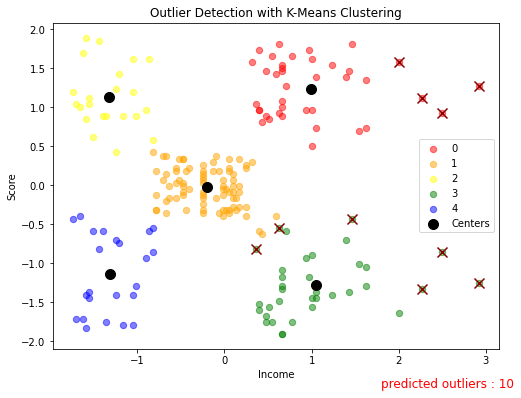

In [33]:
# visualize outliers with scatter plot
plt.figure(figsize=(8, 6))
for i in range(np.max(model.labels_)+1) :
    plt.scatter(df[model.labels_==i].Income,
               df[model.labels_==i].Score, label=i, c=colors[i], alpha=0.5, s=40)
plt.scatter(outliers.Income, outliers.Score, c='darkred', s=100, marker='x')
plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], 
           label='Centers', c='black', s=100)
plt.title('Outlier Detection with K-Means Clustering')
plt.xlabel('Income')
plt.ylabel('Score')
plt.legend()

plt.text(1.8, -2.6, f'predicted outliers : {len(outliers)}',fontdict={'color':'red', 'size':12})
plt.show()

### reference
https://towardsdev.com/outlier-detection-using-k-means-clustering-in-python-214188fc90e8

---

## Outlier Detection with LOF(local outlier factor)

In [11]:
from sklearn.neighbors import LocalOutlierFactor

In [12]:
lof = LocalOutlierFactor(n_neighbors=40, novelty=True, contamination=0.1)
# contamination : outlier percentage of train data
lof.fit(df.loc[:,:'Score'])

LocalOutlierFactor(contamination=0.1, n_neighbors=40, novelty=True)

In [13]:
# lof pred result : -1 outlier , 1 inlier
pred = lof.predict(df.loc[:, :'Score'])

In [14]:
n_errors = (pred != np.ones(200, dtype=int)).sum()

In [15]:
X_scores = lof.negative_outlier_factor_
# X_scores

In [16]:
radius = (X_scores.max() - X_scores) / (X_scores.max() - X_scores.min())
# radius

In [19]:
n = np.copy(X_scores)
n[n>sorted(X_scores)[n_errors-1]]=np.nan
n=np.round(n, 2)

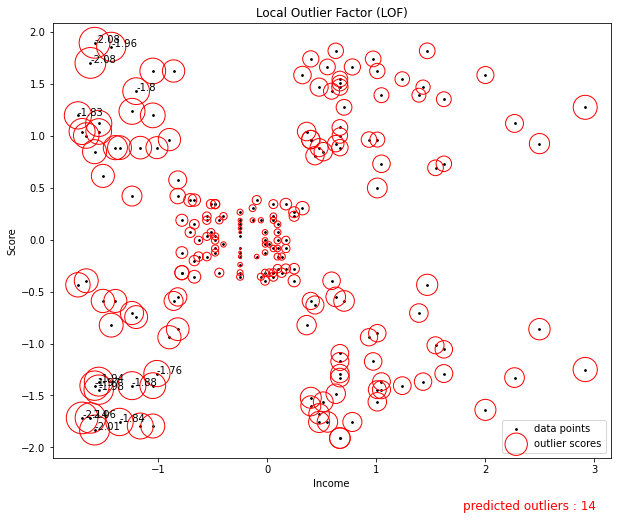

In [20]:
plt.figure(figsize=(10, 8))
plt.title('Local Outlier Factor (LOF)')
plt.scatter(df.loc[:, 'Income'], df.loc[:, 'Score'], s=3.0, color='k', label='data points')

plt.scatter(df.loc[:, 'Income'], df.loc[:, 'Score'], s=1000 * radius,
           edgecolors='r', facecolors='none', label='outlier scores')
plt.axis('tight')
plt.xlabel('Income')
plt.ylabel('Score')
plt.legend(loc='lower right')

for i, text in enumerate(n) :
    if np.isnan(text) : 
        continue
    # annotation with outliers
    plt.annotate(text, (df.loc[i, 'Income'], df.loc[i, 'Score']))

plt.text(1.8, -2.6, f'predicted outliers : {n_errors}',fontdict={'color':'red', 'size':12})
plt.show()

### reference
https://scikit-learn.org/stable/auto_examples/neighbors/plot_lof_outlier_detection.html
https://godongyoung.github.io/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D/2019/03/11/Local-Outlier-Factor(LOF).html

---

## Outlier Detection with iForest(isolation forest)

In [21]:
from sklearn.ensemble import IsolationForest
iforest = IsolationForest(contamination=0.1)
iforest.fit(df.loc[:,:'Score'])
pred = iforest.predict(df.loc[:,:'Score'])
pred

array([-1, -1, -1,  1,  1,  1, -1, -1, -1,  1,  1, -1,  1,  1,  1,  1,  1,
        1,  1, -1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1, -1,  1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,
        1,  1,  1,  1,  1, -1, -1, -1, -1, -1, -1, -1, -1])

In [22]:
n_errors = (pred != np.ones(200, dtype=int)).sum()
n_errors

20

In [ ]:
outlier_index = []
for i in range(len(pred)) :
    if pred[i] == -1 :
        outlier_index.append(i)

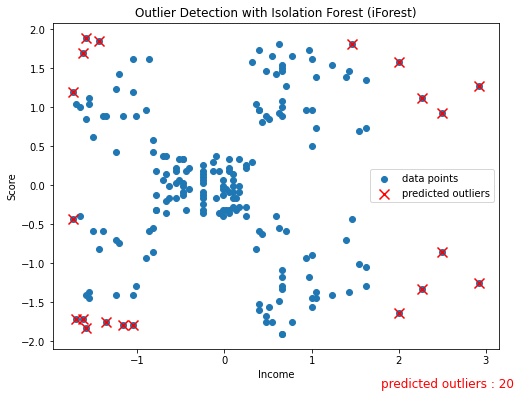

In [32]:
plt.figure(figsize=(8, 6))
plt.title('Outlier Detection with Isolation Forest (iForest)')
plt.scatter(df.Income, df.Score, label='data points')
plt.scatter(df.loc[outlier_index, 'Income'],df.loc[outlier_index, 'Score'], 
            marker='x', color='red', s=100, label='predicted outliers')
plt.xlabel('Income')
plt.ylabel('Score')
plt.text(1.8, -2.6, f'predicted outliers : {n_errors}',fontdict={'color':'red', 'size':12})
plt.legend(loc='center right')
plt.show()

### reference
https://partrita.github.io/posts/isolation-forest/